In [ ]:
#@title RMF Segmentation - Donations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('donations_rfm_w_lables.csv')

df= df[df['revenue'] < 50000]

df.loc[(df['overall_score'] == 2) & (df['revenue'] >= 10000), 'overall_score'] = 3
df.loc[(df['overall_score'] == 3) & (df['revenue'] >= 1000) & (df['revenue'] < 10000), 'overall_score'] = 4 ## add recency as below
df.loc[(df['overall_score'] == 4) & (df['revenue'] >= 1000) & (df['revenue'] < 10000) & (df['recency']> 365), 'overall_score'] = 0
df.loc[(df['overall_score'] == 0) & (df['recency']> 365), 'overall_score'] = 2

df['donation_source'] = 'Default'
df.loc[df['donation_channel'].isin([2,3,4,5,9,11]),'donation_source'] = 'Box Office'
df.loc[df['donation_channel']==6,'donation_source'] = 'Web'
df.loc[df['donation_channel'].isin([10,13]),'donation_source'] = 'Other'

df = df[df['donation_source'] != 'Other']

RFM (Recency, Frequency, Monetary Value) Analysis is a data driven customer segmentation technique that assigns a score to customers based on the combination of three variables:
- Their last purchase,
- How often they have purchased in the past, and
- How much they have spent overall.

This model can be used to identify distinct customer segments and target them more directly. we can gain insights into the preferences and needs of different groups. This will enable us to tailor our marketing efforts to them.

In [ ]:
#@title Segments
df["Segment"] = df["overall_score"].astype(str)
# Create a 3D scatter plot
fig = px.scatter_3d(df, x='recency', y='frequency', z='revenue', color='Segment',width=1600, height=800)


# Set labels for the axes
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Revenue'
))

# Show the plot
fig.show()

NameError: ignored

#Segment Labels
###0 = Subs who have not donated in 1+ years
###1 = Single tix buyers who have not donated in 1+ years
###2 = Single tix buyers
###3 = Major Donors 10K +
###4 = Sub who donate with subscription

In [ ]:
#@title Segment Density
fig = px.scatter_3d(df, x='recency', y='frequency', z='revenue', color='overall_score',log_x=False,log_y=True,log_z=True, width=1600, height=800)


# Set labels for the axes
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Revenue'
))

# Show the plot
fig.show()

#### This plot expands the axis scale based on the size of the clusters, allowing us see that clusters 0 and 1 are quite dense and are larger than clusters 2, 3, and 4.

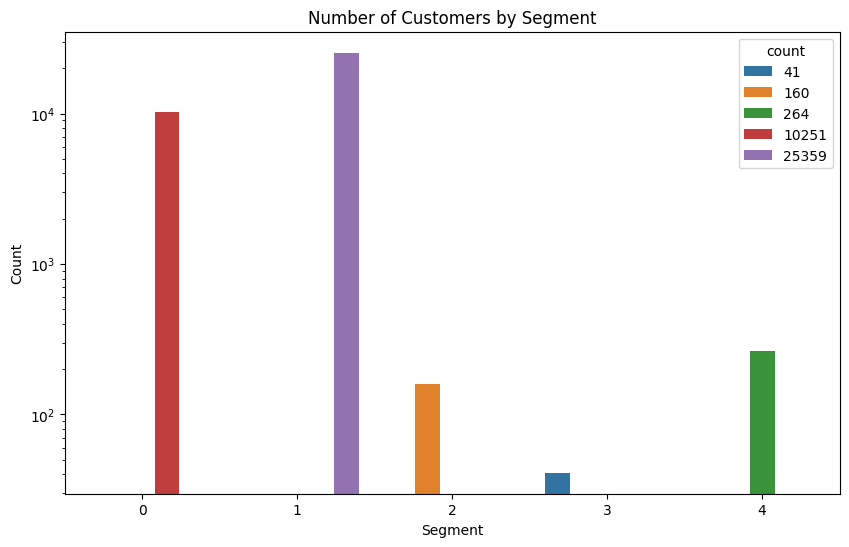

In [ ]:
# @title l
sub_counts = df.groupby(['overall_score']).size().reset_index(name='count')

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_score', y='count', hue ='count', data=sub_counts)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Number of Customers by Segment')
plt.yscale('log')
plt.show()

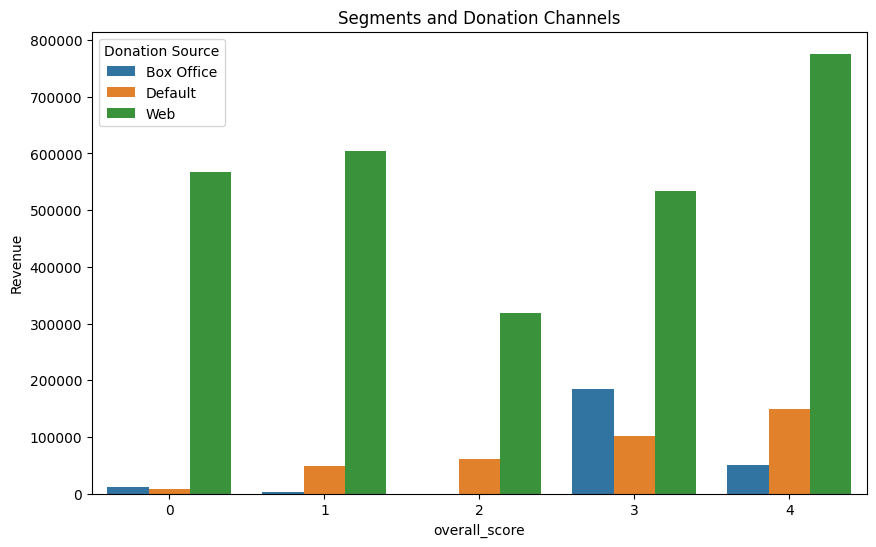

In [ ]:
# @title l
segment_revenue = df.groupby(['overall_score', 'donation_source'])['revenue'].sum().reset_index()

# Create a bar plot with the y-axis representing revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_score', y='revenue', hue='donation_source', data=segment_revenue)
plt.xlabel('overall_score')
plt.ylabel('Revenue')
plt.title('Segments and Donation Channels')
plt.legend(title='Donation Source')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

#### This plot shows the total amount donated by each segment, broken down by channel. The Web channel is by far the largest source of donations across all segements. Notable also is the ammount processed via the box office channel in segment 3.

# Possible Next Steps
- Combining Mosaic data, campaign response data, ticket purchase data to create a customer profile
- Monitor growth of segments to track trends
